In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as CS
import os,datetime,sys,fnmatch
from mpl_toolkits import basemap
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from pyhdf.SD import SD, SDC
import os
import seaborn as sns
from matplotlib.patches import Rectangle

In [2]:
# simple plotting function
def plot_2D_global(lons,lats,data_2D,
                   data_name=None,
                   levels=20,
                   plot_type='normal',
                   vmin=0, vmax=0,
                   cmap='rainbow',
                   label=''
                   ):
    
    mapproj = Basemap(projection='cyl',
                llcrnrlat=-90, #lats.min(),
                llcrnrlon=lons.min(),
                urcrnrlat= 90, #lats.max(),
                urcrnrlon= lons.max())
    
    lonall, latall = mapproj.makegrid(lons.size, lats.size)
    lonproj, latproj = mapproj(lonall, latall)
    
    latlines = np.arange(latall.min(),latall.max()+1,15)
    lonlines = np.arange(lonall.min(),lonall.max()+1,45)
    
    if plot_type =='normal':
        ctr = mapproj.contourf(lonproj, latproj,data_2D,
                           vmin = vmin,
                           vmax = vmax,
                           levels = levels,
                           cmap   = cmap)
        
    elif plot_type == 'difference':
        ctr = mapproj.contourf(lonproj, latproj,data_2D,
                           vmin = vmin,
                           vmax = vmax,
                           levels = levels,
                           cmap   = cmap,
                           cbar_kwargs={"ticks": levels})
        plt.clim(vmin,vmax)
        
    
    
    plt.title(data_name)
    
    mapproj.drawcoastlines()
    mapproj.drawparallels(latlines, labels=[1,0,0,0])
    mapproj.drawmeridians(lonlines, labels=[0,0,0,1])
    
    mapproj.colorbar(ctr,"bottom", size="5%",pad = '20%', label=label)
    
    figname = data_name+'.png'
            
    #plt.savefig('Results/'+figname,dpi=200)
    
    #plt.show()

In [3]:
cesm_trop = np.load('cesm_trop.npy')
calipso_trop = np.load('calipso_trop.npy')
gfdl_trop = np.load('noaa_trop.npy')

cesmcf,cesmcre = np.load('cesm_bins.npy')
gfdlcf,gfdlcre = np.load('noaa_bins.npy')
calipsocf,calipsocre = np.load('calipso_bins.npy')

cesm_trop_hist = np.load('cesm_trop_hist.npy')
calipso_trop_hist = np.load('calipso_trop_hist.npy')
gfdl_trop_hist = np.load('noaa_trop_hist.npy')

cesmcf_hist,cesmcre_hist = np.load('cesm_bins_hist.npy')
gfdlcf_hist,gfdlcre_hist = np.load('noaa_bins_hist.npy')
calipsocf_hist,calipsocre_hist = np.load('calipso_bins_hist.npy')

print (np.shape(cesm_trop))
print (np.shape(calipso_trop))
print (np.shape(gfdl_trop))
print (np.shape(cesm_trop_hist))
print (np.shape(calipso_trop_hist))
print (np.shape(gfdl_trop_hist))

(61, 360)
(61, 360)
(61, 360)
(61, 360)
(61, 360)
(61, 360)


/umbc/xfs1/jianwu/common/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


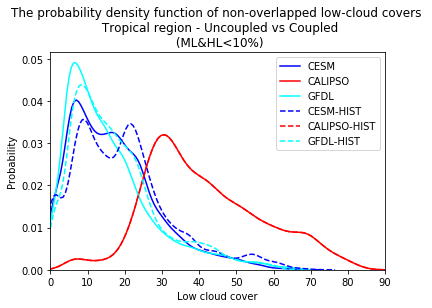

In [4]:
ax1 = sns.distplot(cesm_trop[~np.isnan(cesm_trop)], bins=100, color='blue',label="CESM",hist=False)
ax2 = sns.distplot(calipso_trop[~np.isnan(calipso_trop)], bins=100, color='red',label="CALIPSO",hist=False)
ax3 = sns.distplot(gfdl_trop[~np.isnan(gfdl_trop)], bins=100, color='cyan',label="GFDL",hist=False)
kde_kws={'linestyle':'--'}
ax4 = sns.distplot(cesm_trop_hist[~np.isnan(cesm_trop_hist)], bins=100, color='blue',label="CESM-HIST",kde_kws={'linestyle':'--'},hist=False)
ax5 = sns.distplot(calipso_trop_hist[~np.isnan(calipso_trop_hist)], bins=100, color='red',label="CALIPSO-HIST",kde_kws={'linestyle':'--'},hist=False)
ax6 = sns.distplot(gfdl_trop_hist[~np.isnan(gfdl_trop_hist)], bins=100, color='cyan',label="GFDL-HIST",kde_kws={'linestyle':'--'},hist=False)
plt.legend()
#ax1.set_ylim(0,0.25)
ax1.set_xlim(0,90)
ax1.set(xlabel='Low cloud cover', ylabel='Probability')
plt.title('The probability density function of non-overlapped low-cloud covers \n Tropical region - Uncoupled vs Coupled\n (ML&HL<10%)')
plt.show()

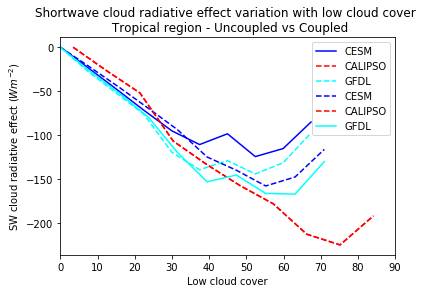

In [5]:
plt.plot(cesmcf,cesmcre,label='CESM',color='blue')
plt.plot(calipsocf,calipsocre, '--',label='CALIPSO',color='red')
plt.plot(gfdlcf,gfdlcre, '--',label='GFDL',color='cyan')
plt.plot(cesmcf_hist,cesmcre_hist, '--',label='CESM',color='blue')
plt.plot(calipsocf_hist,calipsocre_hist, '--',label='CALIPSO',color='red')
plt.plot(gfdlcf_hist,gfdlcre_hist,label='GFDL',color='cyan')
plt.legend()
plt.title('Shortwave cloud radiative effect variation with low cloud cover \n Tropical region - Uncoupled vs Coupled')
plt.xlabel('Low cloud cover')
plt.xlim(0,90)
plt.ylabel('SW cloud radiative effect ($Wm^{-2}$)')
plt.show()